In [ ]:
#CLASSIFICATION

In [1]:
#import necessary libraries
import pandas as pd

In [4]:
#TASK 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DSPL Tutorial 7/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#TASK 2: Find median blood pressure for diagnosed patients
median_bp = df[df['Outcome'] == 1]['BloodPressure'].median()
print("Median Blood Pressure of diagnosed patients:", median_bp)

Median Blood Pressure of diagnosed patients: 74.0


In [23]:
#TASK 3: Check if dataset is balanced
#Variable thatindicates whether a person was diagnosed with diabetes following a test = 'Outcome'
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


The dataset is not balanced

In [7]:
#TASK 4: Separate features to predict diabetes and the target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

#TASK 5: Explain the purpose of the following Python statements. What impact does “stratify=y” have?

The code splits the dataset to train (75%) and test (25%) subsets. X is the independent variable (features) and Y is the dependent variable (target)

test_size=0.25: Allocates 25% of the data for testing and 75% for training.

random_state=42: Ensures reproducibility so the same split occurs every time the code runs.

stratify=y: Maintains the proportion of diabetic and non diabetic cases in both training and testing sets.

stratify=y Ensures that the training and testing sets have the same proportion of positive and negative cases as the original dataset.

It reduces bias and imbalances

In [8]:
#TASK 6:Adapt and modify the code from TASK5 so that a train-test split of 3:1 is obtained
#split 3:1 means 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [22]:
# TASK 7: Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.7447916666666666
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.66      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



Overall accuracy is 74.479% - the model correctly predicts about 74% of the test cases, which is a reasonable but not perfect performance.

Class 0 (Non-Diabetic) Performance:

Precision: 0.78 - When the model predicts "No Diabetes," it is correct 78% of the time.

Recall: 0.85 - The model successfully identifies 85% of actual non-diabetic cases.

F1-score: 0.81 - A strong balance between precision and recall.

Class 1 (Diabetic) Performance:

Precision: 0.66 - When the model predicts "Diabetes," it is correct 66% of the time.

Recall: 0.55 - The model only identifies 55% of actual diabetic cases and misses 45% of them.

F1-score: 0.60 - Weak performance in predicting diabetic cases.

In [12]:
#TASK 8: Check for overfitting
print("Training Accuracy:", dt.score(X_train, y_train))
print("Testing Accuracy:", dt.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.7447916666666666


models are overfitting because there is a perfect training accuracy and a significant drop in testing accuracy

#TASK 9: what do the values “precision” and “recall” refer to?

Precision: The proportion of correctly predicted positive cases out of all predicted positives.

Recall: The proportion of actual positive cases correctly identified.

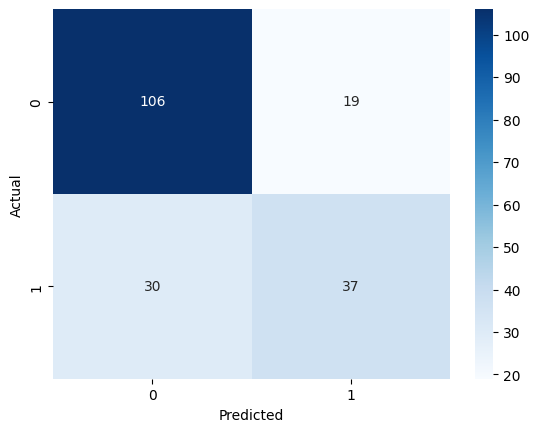

In [13]:
#TASK 10: Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Proportion of false positive cases - (19/192)*100% = 9.89%

The model is better at detecting non-diabetic cases than diabetic cases but it's sensitivity is low.

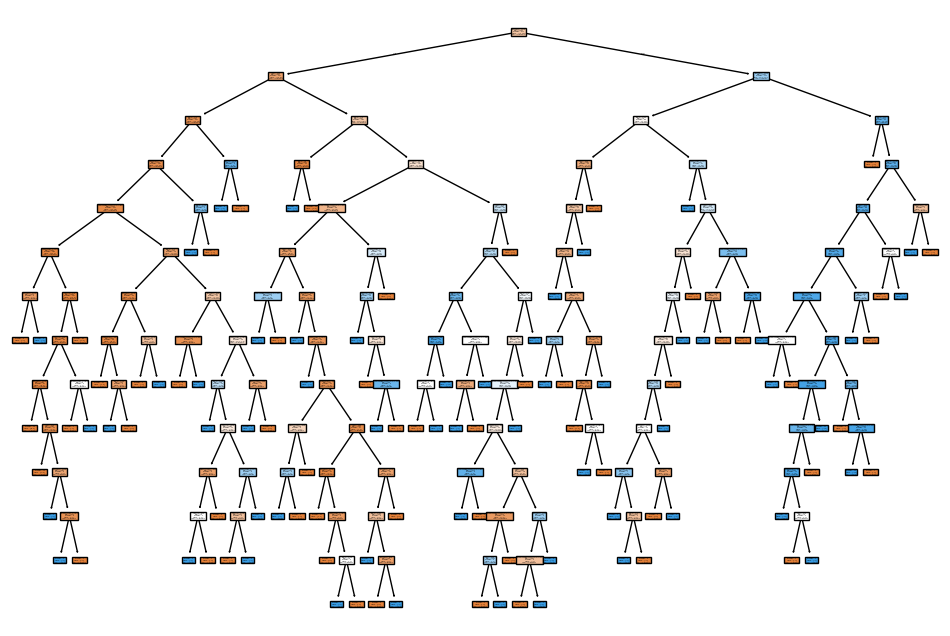

In [15]:
#TASK 11: Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

In [24]:
#TASK 12: Identify important features and rank patient characteristics that are most useful in predicting diabetes.
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance

,0
Glucose,0.339264
BMI,0.168434
DiabetesPedigreeFunction,0.117931
Age,0.115767
BloodPressure,0.097375
Insulin,0.078565
Pregnancies,0.058974
SkinThickness,0.023690


In [25]:
#TASK 13: Train K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       125
           1       0.70      0.39      0.50        67

    accuracy                           0.73       192
   macro avg       0.72      0.65      0.66       192
weighted avg       0.72      0.73      0.70       192



The Decision Tree model performs the best because it has higher accuracy, better recall for diabetes cases, and a stronger F1-score.

In [ ]:
#CLUSTERING

In [39]:
#TASK 14: Load the weather pattern data into a new Pandas data frame
df = pd.read_csv("/content/drive/MyDrive/DSPL Tutorial 7/pm25_2016_2020_v1.csv")
df.head()

,aqs_id,date_local,latitude_x,longitude_x,elevation,dominant_source,measurement_scale,monitoring_objective,tavg,tmin,...,arithmetic_mean_a,arithmetic_mean_b,poc_a,poc_b,meth_type_a,meth_type_b,method_code_a,method_code_b,monitor_type_a,monitor_type_b
0,20-177-0013,6/15/2017,39.024265,-95.711275,280.0,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,NaN,NaN,...,8.6,9.2,1,2,FRM,FEM,145,236,NaN,SLAMS
1,20-177-0013,6/18/2017,39.024265,-95.711275,280.0,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,NaN,NaN,...,3.4,3.9,1,2,FRM,FEM,145,236,NaN,SLAMS
2,20-177-0013,6/21/2017,39.024265,-95.711275,280.0,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,NaN,NaN,...,6.6,6.7,1,2,FRM,FEM,145,236,NaN,SLAMS
3,20-177-0013,6/24/2017,39.024265,-95.711275,280.0,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,NaN,NaN,...,5.1,5.7,1,2,FRM,FEM,145,236,NaN,SLAMS
4,20-177-0013,6/30/2017,39.024265,-95.711275,280.0,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,NaN,NaN,...,5.0,6.4,1,2,FRM,FEM,145,236,NaN,SLAMS


#2 columns that could be used to analyse the geographic distribution of weather monitoring stations

latitude_x and longitude_x

Latitude and longitude provide spatial coordinates that can be used to assess how monitoring stations are geographically distributed.


In [40]:
#TASK 15: Extract these columns into a new Dataframe
df.columns = df.columns.str.strip()
geo_columns = ['latitude_x', 'longitude_x']
X = df[geo_columns].copy()
X.head()

,latitude_x,longitude_x
0,39.024265,-95.711275
1,39.024265,-95.711275
2,39.024265,-95.711275
3,39.024265,-95.711275
4,39.024265,-95.711275


#TASK 16: Understanding the codes
This code applies K-Means clustering to classify the geographic data into 6 clusters.

n_clusters=6 means we are dividing the data into six groups.
fit_predict(X) calculates cluster assignments based on latitude and longitude.

Range of values - 0,1,2,3,4,5

In [41]:
#TASK 17: Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

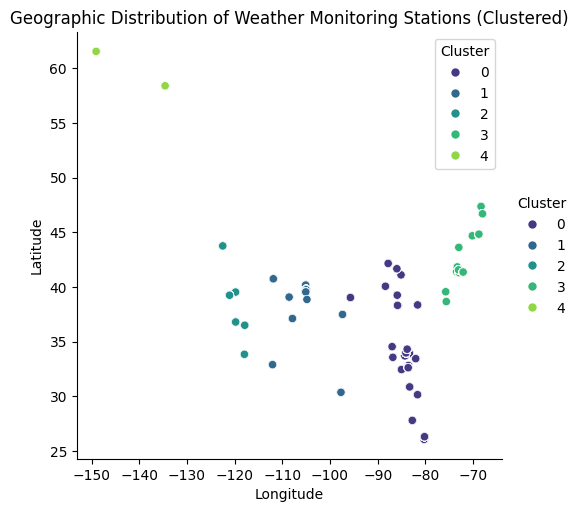

In [44]:
#TASK 18: Fix the error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize']=(12, 8)
sns.relplot(x=df["longitude_x"], y=df["latitude_x"], hue=X["Cluster"], palette="viridis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Weather Monitoring Stations (Clustered)")
plt.legend(title="Cluster")
plt.show()